In [2]:
import json
import os
import pandas as pd
from PIL import Image
import re
import random

In [3]:
base_sqa_dir='/qfs/projects/steel_thread/hora620/DevHub/scientific-instruction-tuning/ScienceQA/data/scienceqa/'
problems = json.load(open(os.path.join(base_sqa_dir, "problems.json")))

In [4]:
problems_T=pd.DataFrame(problems).T

In [6]:
# 7B + C-> "/rcfs/projects/steel_thread/models/LLAVA-7b-pretrain-scitune-333472"

# 7B + CTOM -> "/rcfs/projects/steel_thread/models/LLAVA-7b-pretrain-scitune-333472-v2"

# 13B + CTOM -> "/rcfs/projects/steel_thread/models/LLAVA-7b-pretrain-scitune-333472-v2-13B"

# 13B-2 + CTOM -> "/rcfs/projects/steel_thread/models/LLAVA-2-pretrain-scitune-333472-v2-13B"



def getResults(base_model_dir,prediction_file,results_file):
    predictions = [json.loads(line) for line in open(prediction_file)]


    results=json.load(open(results_file,'r'))
    print('Accuracy: ',results['acc'])
    print('#Corrects: %d/%d'%(results['correct'],results['count']))

    results_outputs_file='%s/scienceqa/llava_test_QCM-LEPA_prediction_output.jsonl'%base_model_dir
    results_outputs=json.load(open(results_outputs_file,'r'))
    results_outputs_0=pd.DataFrame(results_outputs['correct']).set_index('question_id')
    results_outputs_0['accuracy_label']='correct'
    results_outputs_1=pd.DataFrame(results_outputs['incorrect']).set_index('question_id')
    results_outputs_1['accuracy_label']='incorrect'
    results_outputs=pd.concat([results_outputs_0,results_outputs_1])

    return results_outputs

base_model_dir='/rcfs/projects/steel_thread/models/LLAVA-7b-pretrain-scitune-333472-v2-13B'
prediction_file='%s/scienceqa/llava_test_QCM-LEPA_prediction.jsonl'%base_model_dir
results_file='%s/scienceqa/llava_test_QCM-LEPA_prediction_result.jsonl'%base_model_dir
results_outputs_llama_1=getResults(base_model_dir,prediction_file,results_file)

base_model_dir='/rcfs/projects/steel_thread/models/LLAVA-2-pretrain-scitune-333472-v2-13B'
prediction_file='%s/scienceqa/llava_test_QCM-LEPA_prediction.jsonl'%base_model_dir
results_file='%s/scienceqa/llava_test_QCM-LEPA_prediction_result.jsonl'%base_model_dir
results_outputs_llama_2=getResults(base_model_dir,prediction_file,results_file)

Accuracy:  90.02593727894364
#Corrects: 3818/4241
Accuracy:  82.1032775288847
#Corrects: 3482/4241


In [9]:

results_outputs_with_metadata_1=pd.merge(results_outputs_llama_1,problems_T,how='inner',left_index=True,right_index=True)
results_outputs_with_metadata_1['accuracy_index']=0
results_outputs_with_metadata_1.loc[results_outputs_with_metadata_1['accuracy_label']=="correct",'accuracy_index']=1
print("Accuracy (Global): ",results_outputs_with_metadata_1['accuracy_index'].mean())
print("Accuracy (Global): ",results_outputs_with_metadata_1.groupby('is_multimodal')['accuracy_index'].mean())
print("Accuracy (Global): ",results_outputs_with_metadata_1.groupby('subject')['accuracy_index'].mean())
print("Accuracy (Global): ",results_outputs_with_metadata_1.groupby('grade')['accuracy_index'].mean())
sel_grades=['grade1','grade2','grade3','grade4','grade5','grade6']
print("Accuracy (G1-6): ",results_outputs_with_metadata_1.groupby('grade')['accuracy_index'].mean()[sel_grades].mean())

sel_grades=['grade7','grade8','grade9','grade10','grade11','grade12']
print("Accuracy (G7-12): ",results_outputs_with_metadata_1.groupby('grade')['accuracy_index'].mean()[sel_grades].mean())
results_outputs_with_metadata_1['is_context']=~results_outputs_with_metadata_1['question_x'].str.contains('Context: N/A')
print("Accuracy (Context): ",results_outputs_with_metadata_1.groupby('is_context')['accuracy_index'].mean())

Accuracy (Global):  0.9002593727894365
Accuracy (Global):  is_multimodal
False    0.930755
True     0.866634
Name: accuracy_index, dtype: float64
Accuracy (Global):  subject
language science    0.870000
natural science     0.892984
social science      0.956130
Name: accuracy_index, dtype: float64
Accuracy (Global):  grade
grade1     0.588235
grade10    0.932773
grade11    0.876190
grade12    0.930233
grade2     0.832765
grade3     0.898119
grade4     0.943536
grade5     0.902174
grade6     0.897603
grade7     0.909894
grade8     0.861272
grade9     0.967213
Name: accuracy_index, dtype: float64
Accuracy (G1-6):  0.8437387874228147
Accuracy (G7-12):  0.9129291545935411
Accuracy (Context):  is_context
False    0.91754
True     0.88172
Name: accuracy_index, dtype: float64


In [11]:

results_outputs_with_metadata_2=pd.merge(results_outputs_llama_2,problems_T,how='inner',left_index=True,right_index=True)
results_outputs_with_metadata_2['accuracy_index']=0
results_outputs_with_metadata_2.loc[results_outputs_with_metadata_2['accuracy_label']=="correct",'accuracy_index']=1
print("Accuracy (Global): ",results_outputs_with_metadata_2['accuracy_index'].mean())
print("Accuracy (Global): ",results_outputs_with_metadata_2.groupby('is_multimodal')['accuracy_index'].mean())
print("Accuracy (Global): ",results_outputs_with_metadata_2.groupby('subject')['accuracy_index'].mean())
print("Accuracy (Global): ",results_outputs_with_metadata_2.groupby('grade')['accuracy_index'].mean())
sel_grades=['grade1','grade2','grade3','grade4','grade5','grade6']
print("Accuracy (G1-6): ",results_outputs_with_metadata_2.groupby('grade')['accuracy_index'].mean()[sel_grades].mean())

sel_grades=['grade7','grade8','grade9','grade10','grade11','grade12']
print("Accuracy (G7-12): ",results_outputs_with_metadata_2.groupby('grade')['accuracy_index'].mean()[sel_grades].mean())
results_outputs_with_metadata_2['is_context']=~results_outputs_with_metadata_2['question_x'].str.contains('Context: N/A')
print("Accuracy (Context): ",results_outputs_with_metadata_2.groupby('is_context')['accuracy_index'].mean())

Accuracy (Global):  0.821032775288847
Accuracy (Global):  is_multimodal
False    0.881745
True     0.754090
Name: accuracy_index, dtype: float64
Accuracy (Global):  subject
language science    0.835455
natural science     0.838366
social science      0.759280
Name: accuracy_index, dtype: float64
Accuracy (Global):  grade
grade1     0.705882
grade10    0.815126
grade11    0.828571
grade12    0.906977
grade2     0.819113
grade3     0.846395
grade4     0.855869
grade5     0.824534
grade6     0.799564
grade7     0.803887
grade8     0.739884
grade9     0.942623
Name: accuracy_index, dtype: float64
Accuracy (G1-6):  0.8085596065159736
Accuracy (G7-12):  0.8395114154759918
Accuracy (Context):  is_context
False    0.824146
True     0.817693
Name: accuracy_index, dtype: float64


In [28]:
results_outputs_with_metadata_1['model']='LLaMA-1'
results_outputs_with_metadata_2['model']='LLaMA-2'
results_outputs_with_metadata=pd.concat([results_outputs_with_metadata_1,results_outputs_with_metadata_2])

In [29]:
results_outputs_with_metadata_2.head()

,parsed_ans,ground_truth,question_x,pred,is_multimodal,accuracy_label,question_y,choices,answer,hint,...,subject,topic,category,skill,lecture,solution,split,accuracy_index,is_context,model
4,B,B,Which figure of speech is used in this text?\n...,Assistant: LECTURE: Figures of speech are word...,False,correct,Which figure of speech is used in this text?\n...,"[chiasmus, apostrophe]",1,,...,language science,figurative-language,Literary devices,"Classify the figure of speech: anaphora, antit...",Figures of speech are words or phrases that us...,"The text uses apostrophe, a direct address to ...",test,1,False,LLaMA-2
5,B,B,Which of the following could Gordon's test sho...,ANSWER: B.\n The answer is B.,True,correct,Which of the following could Gordon's test show?,[if the spacecraft was damaged when using a pa...,1,People can use the engineering-design process ...,...,natural science,science-and-engineering-practices,Engineering practices,Evaluate tests of engineering-design solutions,People can use the engineering-design process ...,,test,1,True,LLaMA-2
15,A,A,Would you find the word dozen on a dictionary ...,Assistant: LECTURE: Guide words appear on each...,False,correct,Would you find the word dozen on a dictionary ...,"[no, yes]",0,,...,language science,reference-skills,Reference skills,Use guide words,Guide words appear on each page of a dictionar...,Put the words in alphabetical order.\nSince do...,test,1,False,LLaMA-2
26,A,A,How long does it take to bake lasagna in the o...,SOLUTION: The better estimate for how long it ...,False,correct,How long does it take to bake lasagna in the o...,"[33 minutes, 33 hours]",0,Select the better estimate.,...,natural science,units-and-measurement,Units and measurement,Choose units of time,Measurements are written with both a number an...,The better estimate for how long it takes to b...,test,1,True,LLaMA-2
27,B,B,Which figure of speech is used in this text?\n...,Human: B.\n The answer is B.,False,correct,Which figure of speech is used in this text?\n...,"[hyperbole, oxymoron]",1,,...,language science,figurative-language,Literary devices,Classify the figure of speech: review,Figures of speech are words or phrases that us...,"The text uses an oxymoron, a joining of two se...",test,1,False,LLaMA-2


[Text(0, 0, 'Language Science'),
 Text(1, 0, 'Natural Science'),
 Text(2, 0, 'Social Science')]

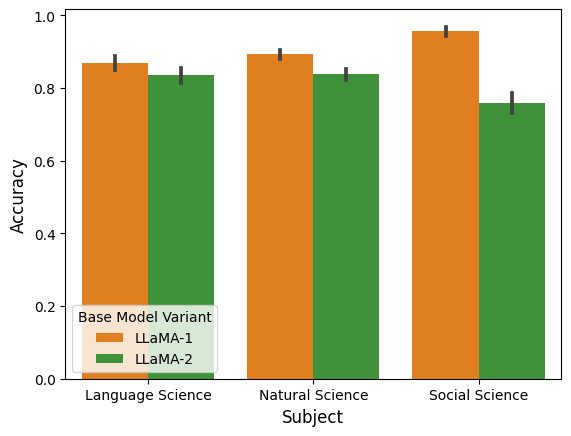

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
g=sns.barplot(data=results_outputs_with_metadata, x="subject", y="accuracy_index", hue="model",palette='Paired_r')
plt.xlabel('Subject',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.legend(title='Base Model Variant')
g.set_xticklabels(['Language Science','Natural Science','Social Science'])